In [1]:
import os
import torch
import torchvision
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, models, transforms
from torchvision.models.resnet import ResNet18_Weights, ResNet50_Weights 
import torchinfo
from torchvision.models.feature_extraction import get_graph_node_names,create_feature_extractor
from torch import Tensor
import datasets
import transformers
import matplotlib.pyplot as plt

/home/taki/miniconda3/envs/mm-cot/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## food101データセット(画像とラベル)

In [4]:
food101_map = {
    "apple_pie": 0,
    "baby_back_ribs": 1,
    "baklava": 2,
    "beef_carpaccio": 3,
    "beef_tartare": 4,
    "beet_salad": 5,
    "beignets": 6,
    "bibimbap": 7,
    "bread_pudding": 8,
    "breakfast_burrito": 9,
    "bruschetta": 10,
    "caesar_salad": 11,
    "cannoli": 12,
    "caprese_salad": 13,
    "carrot_cake": 14,
    "ceviche": 15,
    "cheesecake": 16,
    "cheese_plate": 17,
    "chicken_curry": 18,
    "chicken_quesadilla": 19,
    "chicken_wings": 20,
    "chocolate_cake": 21,
    "chocolate_mousse": 22,
    "churros": 23,
    "clam_chowder": 24,
    "club_sandwich": 25,
    "crab_cakes": 26,
    "creme_brulee": 27,
    "croque_madame": 28,
    "cup_cakes": 29,
    "deviled_eggs": 30,
    "donuts": 31,
    "dumplings": 32,
    "edamame": 33,
    "eggs_benedict": 34,
    "escargots": 35,
    "falafel": 36,
    "filet_mignon": 37,
    "fish_and_chips": 38,
    "foie_gras": 39,
    "french_fries": 40,
    "french_onion_soup": 41,
    "french_toast": 42,
    "fried_calamari": 43,
    "fried_rice": 44,
    "frozen_yogurt": 45,
    "garlic_bread": 46,
    "gnocchi": 47,
    "greek_salad": 48,
    "grilled_cheese_sandwich": 49,
    "grilled_salmon": 50,
    "guacamole": 51,
    "gyoza": 52,
    "hamburger": 53,
    "hot_and_sour_soup": 54,
    "hot_dog": 55,
    "huevos_rancheros": 56,
    "hummus": 57,
    "ice_cream": 58,
    "lasagna": 59,
    "lobster_bisque": 60,
    "lobster_roll_sandwich": 61,
    "macaroni_and_cheese": 62,
    "macarons": 63,
    "miso_soup": 64,
    "mussels": 65,
    "nachos": 66,
    "omelette": 67,
    "onion_rings": 68,
    "oysters": 69,
    "pad_thai": 70,
    "paella": 71,
    "pancakes": 72,
    "panna_cotta": 73,
    "peking_duck": 74,
    "pho": 75,
    "pizza": 76,
    "pork_chop": 77,
    "poutine": 78,
    "prime_rib": 79,
    "pulled_pork_sandwich": 80,
    "ramen": 81,
    "ravioli": 82,
    "red_velvet_cake": 83,
    "risotto": 84,
    "samosa": 85,
    "sashimi": 86,
    "scallops": 87,
    "seaweed_salad": 88,
    "shrimp_and_grits": 89,
    "spaghetti_bolognese": 90,
    "spaghetti_carbonara": 91,
    "spring_rolls": 92,
    "steak": 93,
    "strawberry_shortcake": 94,
    "sushi": 95,
    "tacos": 96,
    "takoyaki": 97,
    "tiramisu": 98,
    "tuna_tartare": 99,
    "waffles": 100,
}


In [5]:
food101_reverse_map = {}
for k, v in food101_map.items():
    food101_reverse_map[v] = k
    
print(food101_reverse_map)

{0: 'apple_pie', 1: 'baby_back_ribs', 2: 'baklava', 3: 'beef_carpaccio', 4: 'beef_tartare', 5: 'beet_salad', 6: 'beignets', 7: 'bibimbap', 8: 'bread_pudding', 9: 'breakfast_burrito', 10: 'bruschetta', 11: 'caesar_salad', 12: 'cannoli', 13: 'caprese_salad', 14: 'carrot_cake', 15: 'ceviche', 16: 'cheesecake', 17: 'cheese_plate', 18: 'chicken_curry', 19: 'chicken_quesadilla', 20: 'chicken_wings', 21: 'chocolate_cake', 22: 'chocolate_mousse', 23: 'churros', 24: 'clam_chowder', 25: 'club_sandwich', 26: 'crab_cakes', 27: 'creme_brulee', 28: 'croque_madame', 29: 'cup_cakes', 30: 'deviled_eggs', 31: 'donuts', 32: 'dumplings', 33: 'edamame', 34: 'eggs_benedict', 35: 'escargots', 36: 'falafel', 37: 'filet_mignon', 38: 'fish_and_chips', 39: 'foie_gras', 40: 'french_fries', 41: 'french_onion_soup', 42: 'french_toast', 43: 'fried_calamari', 44: 'fried_rice', 45: 'frozen_yogurt', 46: 'garlic_bread', 47: 'gnocchi', 48: 'greek_salad', 49: 'grilled_cheese_sandwich', 50: 'grilled_salmon', 51: 'guacamole

Found cached dataset food101 (/home/taki/.cache/huggingface/datasets/food101/default/0.0.0/7cebe41a80fb2da3f08fcbef769c8874073a86346f7fb96dc0847d4dfc318295)
100%|██████████| 2/2 [00:00<00:00, 265.08it/s]


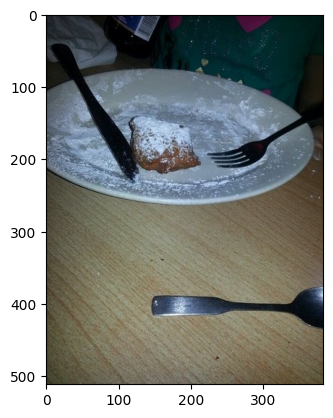

beignets


In [6]:
index = 0
dataset = datasets.load_dataset("food101")
train_dataset = dataset["train"]
sample = train_dataset[0]
plt.imshow(sample["image"])
plt.show()
print(food101_reverse_map[sample["label"]])

In [5]:
sample

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=384x512>,
 'label': 6}

### モデル

In [7]:
class BentoModel(nn.Module):
    def __init__(self, bottle:int, out_dim:int = 7)->None:
        super().__init__()

        #self.conditional_flg = conditional_flg #属性を追加するかしないか
        self.bottle = bottle
        self.out_dim = out_dim

        
        #画像エンコーダー
        resnet18 = models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)
        self.resnet18_feature_extractor = create_feature_extractor(
            resnet18, 
            return_nodes={"flatten":"features"}
        )
        #言語エンコーダー
        self.text_model = transformers.CLIPTextModel.from_pretrained("openai/clip-vit-base-patch32")
        
        #結合層
        num_visual_last_dim = 512
        num_text_last_dim = 512
        self.fc1 = nn.Linear(num_visual_last_dim+num_text_last_dim, self.bottle)
        self.conditional_fc = nn.Linear(self.bottle, out_dim)
        self.sigmoid = nn.Sigmoid()
        
    
    def forward(self, img:Tensor, input_ids:Tensor, attention_mask:Tensor)->Tensor:
        """_summary_

        Args:
            img (Tensor): (batch_size, 3, h, w)
            input_ids (Tensor): (batch_size, sequence_length)
            attention_mask (Tensor): (batch_size, sequence_length)

        Returns:
            Tensor: _description_
        """

        img_f = self.resnet18_feature_extractor(img)["features"]
        txt_f = self.text_model(input_ids,attention_mask)["pooler_output"]
        x = torch.cat((img_f,txt_f), 1)#画像言語特徴量の結合
        x = self.fc1(x)
        x = self.conditional_fc(x)
        x = self.sigmoid(x)

        return x

In [7]:
resnet18 = models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)
resnet18.fc

Linear(in_features=512, out_features=1000, bias=True)

In [9]:
resnet18.fc = nn.Linear(512, 7)
resnet18.fc

Linear(in_features=512, out_features=7, bias=True)

In [10]:
resnet18_feature_extractor = create_feature_extractor(
            resnet18, 
            return_nodes={"flatten":"features"}
        )

In [11]:
resnet18_feature_extractor

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Module(
    (0): Module(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): Module(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2):

In [8]:
img_transform = ResNet18_Weights.IMAGENET1K_V1.transforms()
tokenizer = transformers.CLIPTokenizerFast.from_pretrained("openai/clip-vit-base-patch32") #tokenizer == 言語版transform
print(img_transform)
print(tokenizer)

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)
CLIPTokenizerFast(name_or_path='openai/clip-vit-base-patch32', vocab_size=49408, model_max_length=77, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': AddedToken("<|startoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'eos_token': AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'unk_token': AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'pad_token': '<|endoftext|>'}, clean_up_tokenization_spaces=True)


In [8]:
img_input = img_transform(sample["image"]).unsqueeze(0)
txt_input = tokenizer.batch_encode_plus([food101_reverse_map[sample["label"]]], return_tensors="pt") #list[str]を入力すると、batch_encode_plusは(input_ids, attention_mask)を返す。input_idsは(batch_size,longest_length)のテンソル、attention_maskは(batch_size,longest_length)のテンソル

NameError: name 'img_transform' is not defined

In [34]:
food101_reverse_map[sample["label"]]

'beignets'

In [35]:
txt_input

{'input_ids': tensor([[49406,   571,  1089,  8582, 49407]]), 'attention_mask': tensor([[1, 1, 1, 1, 1]])}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


img


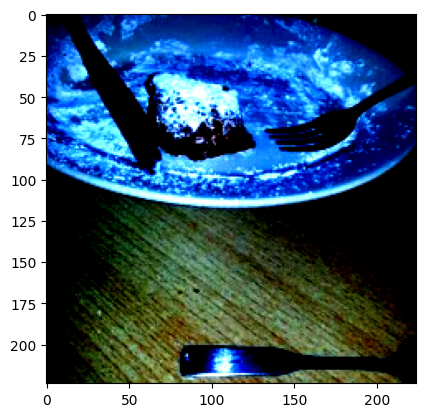

text
['beignets']
attention_mask
torch.Size([1, 5])


In [36]:
print("img")
plt.imshow(img_input.squeeze(0).permute(1, 2, 0))
plt.show()
print("text")
print(tokenizer.batch_decode(txt_input["input_ids"],skip_special_tokens=True))
print("attention_mask")
print(txt_input["attention_mask"].shape)

In [37]:
test_model = BentoModel(512)
torchinfo.summary(test_model, input_data=[img_input, txt_input["input_ids"], txt_input["attention_mask"]])

Some weights of the model checkpoint at openai/clip-vit-base-patch32 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.9.mlp.fc2.weight', 'vision_model.encoder.layers.10.self_attn.q_proj.bias', 'vision_model.encoder.layers.1.self_attn.v_proj.weight', 'vision_model.encoder.layers.0.mlp.fc2.weight', 'vision_model.encoder.layers.5.layer_norm1.weight', 'vision_model.encoder.layers.4.self_attn.out_proj.weight', 'vision_model.encoder.layers.0.mlp.fc1.bias', 'vision_model.pre_layrnorm.weight', 'vision_model.encoder.layers.3.mlp.fc1.bias', 'vision_model.encoder.layers.8.self_attn.v_proj.bias', 'vision_model.encoder.layers.9.mlp.fc1.bias', 'vision_model.encoder.layers.5.self_attn.k_proj.bias', 'vision_model.encoder.layers.11.self_attn.k_proj.bias', 'vision_model.encoder.layers.10.self_attn.k_proj.weight', 'vision_model.encoder.layers.3.self_attn.k_proj.bias', 'vision_model.encoder.layers.4.layer_norm1.weight', 'vision_model.encoder.layers.2.mlp.fc2.bias', 'vision_mode

Layer (type:depth-idx)                                            Output Shape              Param #
BentoModel                                                        [1, 7]                    --
├─ResNet: 1-1                                                     [1, 512]                  --
│    └─Conv2d: 2-1                                                [1, 64, 112, 112]         9,408
│    └─BatchNorm2d: 2-2                                           [1, 64, 112, 112]         128
│    └─ReLU: 2-3                                                  [1, 64, 112, 112]         --
│    └─MaxPool2d: 2-4                                             [1, 64, 56, 56]           --
│    └─Module: 2-5                                                --                        --
│    │    └─Module: 3-1                                           --                        73,984
│    │    └─Module: 3-2                                           --                        73,984
│    └─Module: 2-6               

In [12]:
txt_input

{'input_ids': tensor([[49406,   571,  1089,  8582, 49407]]), 'attention_mask': tensor([[1, 1, 1, 1, 1]])}

In [38]:
out = test_model(img_input,txt_input["input_ids"],txt_input["attention_mask"])
print(out.shape )
print(out)

torch.Size([1, 7])
tensor([[0.5515, 0.6664, 0.3516, 0.4540, 0.5857, 0.4562, 0.4627]],
       grad_fn=<SigmoidBackward0>)


In [52]:
text_model = transformers.CLIPTextModel.from_pretrained("openai/clip-vit-base-patch32")
text_model(txt_input["input_ids"],txt_input["attention_mask"])

Some weights of the model checkpoint at openai/clip-vit-base-patch32 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.9.mlp.fc2.weight', 'vision_model.encoder.layers.10.self_attn.q_proj.bias', 'vision_model.encoder.layers.1.self_attn.v_proj.weight', 'vision_model.encoder.layers.0.mlp.fc2.weight', 'vision_model.encoder.layers.5.layer_norm1.weight', 'vision_model.encoder.layers.4.self_attn.out_proj.weight', 'vision_model.encoder.layers.0.mlp.fc1.bias', 'vision_model.pre_layrnorm.weight', 'vision_model.encoder.layers.3.mlp.fc1.bias', 'vision_model.encoder.layers.8.self_attn.v_proj.bias', 'vision_model.encoder.layers.9.mlp.fc1.bias', 'vision_model.encoder.layers.5.self_attn.k_proj.bias', 'vision_model.encoder.layers.11.self_attn.k_proj.bias', 'vision_model.encoder.layers.10.self_attn.k_proj.weight', 'vision_model.encoder.layers.3.self_attn.k_proj.bias', 'vision_model.encoder.layers.4.layer_norm1.weight', 'vision_model.encoder.layers.2.mlp.fc2.bias', 'vision_mode

BaseModelOutputWithPooling(last_hidden_state=tensor([[[ 0.3393,  0.1165,  0.1020,  ...,  0.2468,  0.5906,  0.1013],
         [ 1.6300, -0.9695,  0.0629,  ..., -0.4306,  0.0340, -1.5308],
         [ 0.6424,  0.2703,  0.2728,  ..., -0.2786,  0.8497, -0.5473],
         [ 0.8894, -0.5330, -0.6500,  ..., -0.6642,  1.3356, -0.9934],
         [ 2.1954,  0.0697, -0.3347,  ...,  0.1294,  0.8494, -1.0549]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[ 2.1954e+00,  6.9652e-02, -3.3467e-01,  7.0027e+00, -3.9999e+00,
          6.7464e-01, -3.6941e-01, -1.3897e-01, -1.1792e+00, -5.3835e-01,
          8.1531e-01,  1.5839e-01,  1.0194e+00, -6.1078e-01, -8.1226e-01,
         -9.4547e-01, -4.3727e-01, -5.1062e-01,  7.2343e-01, -1.0584e+00,
          5.9249e-01, -1.7788e-01, -5.7109e-01, -4.3279e-01, -2.0544e+00,
         -6.7004e-02, -1.2296e+00, -5.9066e-01,  2.6846e-01,  2.9085e-01,
          4.0398e-01,  9.1900e-01, -1.6098e+00,  8.7755e-01,  1.9367e+00,
         -3.5030e-01, 

In [56]:
text_model(txt_input["input_ids"],txt_input["attention_mask"])['pooler_output'].shape

torch.Size([1, 512])

In [57]:
text_model(txt_input["input_ids"],txt_input["attention_mask"])['last_hidden_state'].shape

torch.Size([1, 5, 512])

In [41]:
text_model(txt_input["input_ids"],txt_input["attention_mask"]).keys()

odict_keys(['last_hidden_state', 'pooler_output'])

# txt enc 変更

In [167]:
clip_txt_model = transformers.CLIPTextModel.from_pretrained("openai/clip-vit-base-patch32")
clip_tokenizer = transformers.CLIPTokenizerFast.from_pretrained("openai/clip-vit-base-patch32") 

Some weights of the model checkpoint at openai/clip-vit-base-patch32 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.9.mlp.fc2.weight', 'vision_model.encoder.layers.10.self_attn.q_proj.bias', 'vision_model.encoder.layers.1.self_attn.v_proj.weight', 'vision_model.encoder.layers.0.mlp.fc2.weight', 'vision_model.encoder.layers.5.layer_norm1.weight', 'vision_model.encoder.layers.4.self_attn.out_proj.weight', 'vision_model.encoder.layers.0.mlp.fc1.bias', 'vision_model.pre_layrnorm.weight', 'vision_model.encoder.layers.3.mlp.fc1.bias', 'vision_model.encoder.layers.8.self_attn.v_proj.bias', 'vision_model.encoder.layers.9.mlp.fc1.bias', 'vision_model.encoder.layers.5.self_attn.k_proj.bias', 'vision_model.encoder.layers.11.self_attn.k_proj.bias', 'vision_model.encoder.layers.10.self_attn.k_proj.weight', 'vision_model.encoder.layers.3.self_attn.k_proj.bias', 'vision_model.encoder.layers.4.layer_norm1.weight', 'vision_model.encoder.layers.2.mlp.fc2.bias', 'vision_mode

In [181]:
txt_input = "Studies have been shown that owning a dog is good for you"
txt_input = clip_tokenizer.batch_encode_plus([txt_input], return_tensors="pt")
txt_input

{'input_ids': tensor([[49406,  6426,   720,  1025,  8506,   682, 24661,   320,  1929,   533,
           886,   556,   592, 49407]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [184]:
clip_tokenizer.tokenize("Studies have been shown that owning a dog is good for you")

['studies</w>',
 'have</w>',
 'been</w>',
 'shown</w>',
 'that</w>',
 'owning</w>',
 'a</w>',
 'dog</w>',
 'is</w>',
 'good</w>',
 'for</w>',
 'you</w>']

In [189]:
txt_f = clip_txt_model(txt_input["input_ids"],txt_input["attention_mask"]).last_hidden_state
txt_f

tensor([[[ 3.3929e-01,  1.1646e-01,  1.0195e-01,  ...,  2.4677e-01,
           5.9064e-01,  1.0130e-01],
         [-3.2356e-01, -1.9475e-01,  8.4122e-02,  ...,  1.1547e+00,
           8.9105e-01, -1.8048e+00],
         [-4.9168e-01, -5.6251e-01, -9.9165e-01,  ...,  4.8095e-01,
           6.2915e-01, -9.8562e-01],
         ...,
         [ 1.1497e-03,  1.7150e-01,  7.2287e-01,  ..., -8.7701e-01,
          -4.4782e-01, -4.2113e-01],
         [-9.8934e-02, -9.4822e-01, -2.7503e-01,  ..., -1.4097e+00,
           5.4656e-01, -4.2435e-01],
         [-2.5321e-02, -1.6694e-02,  4.1979e-01,  ..., -5.3528e-01,
           1.6378e-01, -5.0213e-01]]], grad_fn=<NativeLayerNormBackward0>)

In [191]:
txt_input['input_ids']

tensor([[49406,  6426,   720,  1025,  8506,   682, 24661,   320,  1929,   533,
           886,   556,   592, 49407]])

In [190]:
txt_f = txt_f[torch.arange(txt_f.shape[0]), txt_input['input_ids'].argmax(dim=-1)]
txt_f

tensor([[-2.5321e-02, -1.6694e-02,  4.1979e-01,  7.7558e+00, -7.9777e+00,
          1.8718e+00,  1.8089e+00,  2.0449e+00, -3.0887e-01,  1.0518e+00,
          1.5750e-01,  5.1425e-01,  1.0993e+00, -1.0789e-01,  8.5410e-01,
         -1.7511e+00, -1.9600e+00,  2.0817e-01, -4.1916e-01,  1.3266e-01,
          3.6010e-01,  8.9378e-02,  9.4824e-02, -2.1869e-01, -1.6105e+00,
         -6.6059e-01,  1.0099e+00, -5.3933e-01, -1.1723e+00, -1.3117e+00,
          9.1806e-03, -3.3721e-01,  2.3286e-01,  8.1502e-01, -7.3185e-01,
         -1.6624e-02,  7.6099e-01,  8.7783e-01,  1.2524e+00,  9.2571e-01,
          9.7377e-01, -1.8671e+00, -1.5371e-01, -5.6437e-01, -4.5029e-01,
         -5.0667e-01,  1.1460e+00, -3.4767e-01,  1.0969e+00, -2.2091e-01,
         -9.4311e-01,  9.4691e-01,  1.4136e+00,  8.3611e-01,  2.9633e-01,
         -2.2275e-01,  2.2275e-01, -5.1886e-01, -3.9025e-01,  4.8927e-01,
         -4.3844e-01, -6.6060e-01,  1.8384e+00,  3.1465e+00, -1.8161e+00,
         -7.7493e-01,  3.1131e-01, -5.

In [175]:
txt_input

{'input_ids': tensor([[49406,  1559, 49407],
        [49406,  2368, 49407],
        [49406,  1929, 49407]]), 'attention_mask': tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]])}

# T5

In [9]:
#画像エンコーダー
resnet18 = models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)
resnet18_feature_extractor = create_feature_extractor(
    resnet18, 
    return_nodes={"flatten":"features"}
)

In [10]:
resnet18_feature_extractor

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Module(
    (0): Module(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): Module(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2):

In [11]:
resnet18

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [17]:
img_input = img_transform(sample["image"]).unsqueeze(0)
txt_input = "Studies have been shown that "#owning a dog is good for you"

In [18]:
# average poolingの後を持ってくる
resnet18_feature_extractor = create_feature_extractor(
    resnet18, 
    return_nodes={"layer4":"features"}
)

In [19]:
from transformers import T5Tokenizer, T5EncoderModel
tokenizer = T5Tokenizer.from_pretrained('t5-small')
model = T5EncoderModel.from_pretrained('t5-small')
input_ids = tokenizer(txt_input, return_tensors="pt").input_ids  # Batch size 1
txt_f = model(input_ids=input_ids).last_hidden_state
img_f = resnet18_feature_extractor(img_input)["features"]
fc = nn.Linear(model.config.d_model, 512)

In [23]:
txt_f[0].shape

torch.Size([6, 512])

In [15]:
resnet18_feature_extractor(img_input)["features"]

tensor([[[[2.5983, 5.1292, 2.4913,  ..., 2.5609, 2.2499, 1.2210],
          [0.8734, 3.1706, 2.9090,  ..., 3.1479, 1.7540, 1.1767],
          [1.4377, 0.6484, 1.8665,  ..., 1.2652, 0.8945, 0.9872],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.3132, 1.2035],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.2822, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.2299,  ..., 0.8756, 2.7587, 3.7003],
          [0.0000, 0.0000, 0.0449,  ..., 1.2859, 2.9791, 4.0388],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 1.4525, 2.4562],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.4471, 1.3891, 1.3818],
          [0.0000, 1.7317, 2.3434,  ..., 1.4186, 0.0367, 0.0000],
          [0.0000, 1.3841, 2.8319,  ..., 2.0533, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0370,  ..., 3.1666, 4.0890, 3.9464],
          [0.0000, 0.0000, 0.0000,  ..., 2.2155, 3.1167, 3.3469],
          [0.0000, 0.0000, 0.3528,  ..., 2

In [81]:
img_f = resnet18_feature_extractor(img_input)["features"]
ap =  nn.AdaptiveAvgPool2d((1, 1))
img_f = ap(img_f)
img_f = img_f.view(img_f.size(0), -1)
img_f.shape

torch.Size([1, 512])

In [88]:
resnet18_feature_extractor(img_input)["features"].shape

torch.Size([1, 512, 7, 7])

In [123]:
tokenizer(txt_input,  padding=True, return_tensors="pt")

{'input_ids': tensor([[6536,   43,  118, 2008,   24,  293,   53,    3,    9, 1782,   19,  207,
           21,   25,    1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [83]:
img_f[0][0]

tensor(0.9468, grad_fn=<SelectBackward0>)

In [74]:
img_f.shape

torch.Size([1, 512, 7, 7])

In [92]:
txt_f.shape

torch.Size([1, 15, 512])

In [33]:
txt_f

tensor([[[ 0.2255,  0.0652,  0.1506,  ..., -0.1901,  0.0758, -0.0370],
         [ 0.1475,  0.0523, -0.1781,  ...,  0.1769,  0.0440,  0.1491],
         [ 0.0141, -0.0928, -0.1884,  ...,  0.1242,  0.0901,  0.3038],
         [-0.1803,  0.1246, -0.0498,  ...,  0.1303, -0.0259,  0.1555],
         [-0.0028,  0.1073, -0.0575,  ..., -0.0055, -0.0822, -0.0795],
         [ 0.0062,  0.0867,  0.0399,  ...,  0.0892,  0.0639,  0.1200]]],
       grad_fn=<MulBackward0>)

In [36]:
ap =  nn.AdaptiveAvgPool2d((15,1))
out = ap(txt_f)
#out.squeeze(1)
out.view(out.size(0), -1)

tensor([[ 9.6575e-03,  9.6575e-03,  9.8174e-03,  9.9773e-03,  9.9773e-03,
          7.9529e-03,  7.9529e-03,  3.9466e-03, -5.9759e-05, -5.9759e-05,
         -8.1935e-04, -8.1935e-04, -3.5958e-03, -6.3722e-03, -6.3722e-03]],
       grad_fn=<ViewBackward0>)

In [87]:
txt_f.shape

torch.Size([1, 15, 512])

In [20]:
mha_layer = torch.nn.MultiheadAttention(embed_dim=512, kdim=512, vdim=512, num_heads=1, batch_first=True)
mha_layer

MultiheadAttention(
  (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
)

In [65]:
mha_layer(txt_f, img_f[0], img_f[0])[0].shape

AssertionError: For unbatched (2-D) `query`, expected `key` and `value` to be 2-D but found 3-D and 3-D tensors respectively

In [34]:
txt_f[0]

tensor([[ 0.2828,  0.0979,  0.1090,  ..., -0.2794,  0.2154,  0.0370],
        [ 0.1593,  0.0956, -0.0922,  ...,  0.1854,  0.0993,  0.1548],
        [ 0.0076,  0.0090, -0.0092,  ...,  0.0050,  0.0019,  0.0076],
        ...,
        [-0.0119, -0.1228, -0.0638,  ..., -0.0602, -0.1791, -0.0499],
        [-0.0342, -0.0511, -0.1488,  ...,  0.3007, -0.2612, -0.1452],
        [ 0.0670,  0.1300, -0.0356,  ..., -0.0100,  0.0690, -0.0531]],
       grad_fn=<SelectBackward0>)

In [48]:
img_f

tensor([[[[0.9468]],

         [[0.9852]],

         [[0.9406]],

         [[1.0701]],

         [[0.9411]],

         [[0.8921]],

         [[0.9035]],

         [[1.1344]],

         [[0.9856]],

         [[0.9036]],

         [[0.9532]],

         [[0.8886]],

         [[0.9423]],

         [[0.8917]],

         [[0.9379]],

         [[0.8813]],

         [[0.9250]],

         [[1.3573]],

         [[0.8902]],

         [[0.8618]],

         [[0.8848]],

         [[1.0986]],

         [[0.9600]],

         [[1.0011]],

         [[0.9570]],

         [[0.9523]],

         [[0.9507]],

         [[1.0058]],

         [[0.8336]],

         [[0.8517]],

         [[0.9002]],

         [[0.8090]],

         [[0.8568]],

         [[0.8888]],

         [[0.8820]],

         [[0.8262]],

         [[0.9753]],

         [[0.8944]],

         [[0.8922]],

         [[0.9346]],

         [[0.9222]],

         [[0.8337]],

         [[0.8195]],

         [[0.9401]],

         [[0.8373]],

         [

In [160]:
input_ids

tensor([[6536,   43,  118, 2008,   24,  293,   53,    3,    9, 1782,   19,  207,
           21,   25,    1]])

In [161]:

input_ids.argmax(dim=-1)

tensor([0])

In [162]:
torch.arange(txt_f.shape[0])

tensor([0])

In [16]:
txt_f.shape

torch.Size([1, 15, 512])

In [125]:
txt_f[torch.arange(txt_f.shape[0]), input_ids.argmax(dim=-1)]

tensor([[ 2.8280e-01,  9.7876e-02,  1.0901e-01, -2.0035e-01,  1.1355e-01,
         -8.9617e-02,  1.0226e-01, -2.5871e-01, -4.3727e-02, -2.5107e-02,
         -3.2771e-01, -2.9573e-02, -2.6875e-01, -4.6916e-01, -3.3881e-01,
         -3.1448e-01, -2.8099e-02,  9.9633e-02,  1.7431e-01, -2.1637e-01,
         -1.9579e-01, -5.1583e-02,  6.3871e-02, -1.3357e-01,  5.3117e-01,
          2.2738e-01, -8.4225e-02, -6.7732e-03,  2.8944e-01, -1.3994e-01,
          2.8164e-01, -8.4062e-02,  1.9829e-02,  2.3901e-01, -2.7515e-01,
          1.3922e-03, -2.0870e-01,  7.4198e-02, -1.5404e-01, -4.6564e-02,
         -1.1982e-01,  2.2070e-01,  2.9698e-01, -1.0742e-01,  1.2926e-02,
          1.0556e-02, -6.9579e-03,  4.8357e-02, -6.1886e-02,  9.5232e-03,
          5.4959e-02,  1.5862e-02, -2.5529e-02, -1.1814e-01, -3.4588e-03,
          1.0061e-03, -1.4248e-01, -1.4090e-01, -1.8485e-01,  2.2253e-02,
          1.5754e-02,  7.5149e-02,  4.1756e-01,  2.3029e-01, -2.3220e-01,
         -1.0767e-02, -2.5632e-02,  4.

In [124]:
input_ids.argmax(dim=-1)

tensor([0])

In [92]:
torch.cat((img_f,txt_f), 1)

RuntimeError: Tensors must have same number of dimensions: got 2 and 3

In [4]:
# txtの中に"clip"が含まれていたらプリントし、含まれていなかったらプリントしない
txt = "T5_only"
if "T5" in txt:
    print(txt)


T5_only


## dataloader
※テキストトークンは可変長なのでそのままだとdataloaderでエラーが出る<br>
dataloaderのcollate fnを変更し、テキストバッチlist[str]をtokenizer.batch_encode_plusで(batch_size,longest_length)のTensorに変換する<br>
https://qiita.com/tomp/items/f220bd6ffec006dabaa5


##

# dataset確認

## 滝

In [13]:
# json fileの読み込み
import json
import os

data_dir = "/home/taki/bento_VL/data/bento-json/taki/"

# data_dir内のファイル名を全て取得
files = os.listdir(data_dir)

# 全てのjsonファイルを抽出
json_files = [f for f in files if os.path.isfile(os.path.join(data_dir, f)) and f.endswith(".json")]

# jsonファイルを並び変え
json_files.sort()

# jsonファイルを読み込み
json_data_list = []
for j in json_files:
    with open(os.path.join(data_dir, j), "r") as f:
        json_data = json.load(f)
        json_data_list.append(json_data)





In [98]:
json_data_list[0].keys()

dict_keys(['version', 'flags', 'shapes', 'imagePath', 'imageData', 'imageHeight', 'imageWidth'])

In [99]:
json_data_list[0]["shapes"][0]

{'label': 'わかめと梅のふりかけご飯',
 'points': [[459.47368421052636, 302.89473684210526]],
 'group_id': 1,
 'shape_type': 'point',
 'flags': {}}

In [100]:
# 日本語のラベルと英語のラベルが同じか確認
check_data_list = []

for i in range(len(json_data_list)):

    id_0 = 0
    id_1 = 0
        
    for data in json_data_list[i]["shapes"]:
        
        if data["group_id"] == 0:
            id_0 = id_0 + 1 
        elif data["group_id"] == 1:
            id_1 = id_1 + 1

    if id_0 != id_1:
        check_data_list.append(json_data_list[i]['imagePath'])

In [101]:
len(check_data_list)

0

In [102]:
check_data_list

[]

In [133]:
import re
# carot を　carrotに変換
check_data_list = []
pattrn = r'carot'
for i in range(len(json_data_list)):
    for data in json_data_list[i]["shapes"]:
        if re.search(pattrn, data["label"]):
            #data["label"] = "carrot"
            print(data["label"])

            check_data_list.append(json_data_list[i]['imagePath'])

In [134]:
len(check_data_list)

0

In [135]:
check_data_list

[]

In [138]:
# 不明リスト抽出
check_data_list = []

for i in range(len(json_data_list)):
        
    for data in json_data_list[i]["shapes"]:
        
        if data["group_id"] == 2:
            check_data_list.append(json_data_list[i]['imagePath'])
        
print(len(check_data_list))

39


In [137]:
check_data_list

['cookgram  (186).jpg',
 'cookgram  (202).jpg',
 'cookgram  (32).jpg',
 'hayaben_tarou (13).jpg',
 'hayaben_tarou (16).jpg',
 'hayaben_tarou (7).jpg',
 'hikameshi (20).jpg',
 'hikameshi (26).jpg',
 'hitorigohan (120).jpg',
 'hitorigohan (127).jpg',
 'hitorigohan (156).jpg',
 'hitorigohan (165).jpg',
 'hitorigohan (172).jpg',
 'hitorigohan (176).jpg',
 'hitorigohan (180).jpg',
 'hitorigohan (181).jpg',
 'hitorigohan (184).jpg',
 'hitorigohan (185).jpg',
 'hitorigohan (195).jpg',
 'hitorigohan (209).jpg',
 'hitorigohan (216).jpg',
 'hitorigohan (218).jpg',
 'hitorigohan (219).jpg',
 'hitorigohan (60).jpg',
 'hitorigohan (73).jpg',
 'hitorigohan (97).jpg',
 'm_bookcook (12).jpg',
 'm_bookcook (145).jpg',
 'm_bookcook (150).jpg',
 'm_bookcook (5).jpg',
 'm_bookcook (60).jpg',
 'makiwappa  (14).jpg',
 'makiwappa  (33).jpg',
 'makiwappa  (35).jpg',
 'makiwappa  (8).jpg',
 'meme (7).jpg',
 'miiko (18).jpg',
 'nagae_bento (100).jpg',
 'nagae_bento (112).jpg']

# 吉田君

In [139]:
# json fileの読み込み
import json
import os

data_dir = "/home/taki/bento_VL/data/bento-json/yoshida/"

# data_dir内のファイル名を全て取得
files = os.listdir(data_dir)

# 全てのjsonファイルを抽出
json_files = [f for f in files if os.path.isfile(os.path.join(data_dir, f)) and f.endswith(".json")]

# jsonファイルを並び変え
json_files.sort()

# jsonファイルを読み込み
json_data_list = []
for j in json_files:
    with open(os.path.join(data_dir, j), "r") as f:
        json_data = json.load(f)
        json_data_list.append(json_data)



In [62]:
check_data_list = []

for i in range(len(json_data_list)):

    id_0 = 0
    id_1 = 0
        
    for data in json_data_list[i]["shapes"]:
        
        if data["group_id"] == 0:
            id_0 = id_0 + 1 
        elif data["group_id"] == 1:
            id_1 = id_1 + 1

    if id_0 != id_1:
        check_data_list.append(json_data_list[i]['imagePath'])

In [63]:
len(check_data_list)

26

In [64]:
check_data_list

['onaka__suita (110).jpg',
 'onaka__suita (92).jpg',
 'rikioku (18).jpg',
 'rikioku (37).jpg',
 'rikioku (68).jpg',
 'rumi (10).jpg',
 'rumi (20).jpg',
 'sapooo (7).jpg',
 'sora (24).jpg',
 'sora (38).jpg',
 'sora (56).jpg',
 'sora (76).jpg',
 'toco (19).jpg',
 'toco (37).jpg',
 'toco (4).jpg',
 'toco (48).jpg',
 'toco (62).jpg',
 'toco (79).jpg',
 'toco (83).jpg',
 'tomoko (107).jpg',
 'tomoko (148).jpg',
 'uco (38).jpg',
 'user_nakami  (77).jpg',
 'wappakun (13).jpg',
 'yk (28).jpg',
 'yumben (5).jpg']

In [131]:
import re
# carot を　carrotに変換
check_data_list = []
pattrn = r'multigrain'
for i in range(len(json_data_list)):
    for data in json_data_list[i]["shapes"]:
        if re.search(pattrn, data["label"]):
            #data["label"] = "carrot"
            print(data["label"])

            check_data_list.append(json_data_list[i]['imagePath'])

multigrain rice
multigrain rice
multigrain rice
multigrain rice
multigrain rice
multigrain rice
multigrain rice
multigrain rice
multigrain rice
multigrain rice
multigrain rice
multigrain rice


In [120]:
check_data_list

[]

In [140]:
# 不明リスト抽出
check_data_list = []

for i in range(len(json_data_list)):
        
    for data in json_data_list[i]["shapes"]:
        
        if data["group_id"] == 2:
            check_data_list.append(json_data_list[i]['imagePath'])
        
print(len(check_data_list))

8


In [141]:
check_data_list

['naoben (12).jpg',
 'sora (41).jpg',
 'sora (76).jpg',
 'toco (51).jpg',
 'tomoko (5).jpg',
 'user_nakami  (29).jpg',
 'yk (28).jpg',
 'yk (73).jpg']

# データセット読み込みの確認

In [58]:
import pandas as pd
df = pd.read_csv("./score_ml_promax_7_update.csv")
df

,path,factor1,factor2,factor3,factor4,factor5,factor6,factor7
0,11n24y (10).jpg,0.626011,0.512187,0.667759,0.278341,0.679017,0.644536,0.385473
1,11n24y (15).jpg,0.418966,0.577724,0.472596,0.154524,0.519459,0.653625,0.461815
2,11n24y (20).jpg,0.544230,0.482227,0.734638,0.268911,0.674837,0.755683,0.368004
3,11n24y (22).jpg,0.434133,0.684328,0.324193,0.268570,0.467308,0.839506,0.470191
4,11n24y (24).jpg,0.478149,0.539188,0.227575,0.338072,0.437760,0.667763,0.355663
...,...,...,...,...,...,...,...,...
994,yumben (57).jpg,0.649259,0.649115,0.638141,0.379576,0.643529,0.731639,0.363457
995,yumben (58).jpg,0.405739,0.364467,0.716503,0.342739,0.554483,0.523175,0.407680
996,yumben (59).jpg,0.453467,0.285186,0.835852,0.285848,0.391417,0.458061,0.253789
997,yumben (60).jpg,0.717414,0.582687,0.548351,0.454048,0.435609,0.778868,0.589075


In [68]:
image_paths = df['path']
image_paths

0      11n24y (10).jpg
1      11n24y (15).jpg
2      11n24y (20).jpg
3      11n24y (22).jpg
4      11n24y (24).jpg
            ...       
994    yumben (57).jpg
995    yumben (58).jpg
996    yumben (59).jpg
997    yumben (60).jpg
998     yumben (9).jpg
Name: path, Length: 999, dtype: object

In [69]:
# image_pathsの文字列 ".jpg"を".json"に置換
json_paths = image_paths.str.replace(".jpg", ".json")
json_paths

/tmp/ipykernel_553583/451363196.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  json_paths = image_paths.str.replace(".jpg", ".json")


0      11n24y (10).json
1      11n24y (15).json
2      11n24y (20).json
3      11n24y (22).json
4      11n24y (24).json
             ...       
994    yumben (57).json
995    yumben (58).json
996    yumben (59).json
997    yumben (60).json
998     yumben (9).json
Name: path, Length: 999, dtype: object

In [63]:
# json fileの読み込み
import json
import os

data_dir = "/home/taki/bento_VL/data/bento-json/"


# jsonファイルを読み込み
json_data_list = {}
for j in json_paths:
    with open(os.path.join(data_dir, j), "r") as f:
        json_data = json.load(f)
        json_data_list[j] = json_data





In [71]:
image_paths[33]

'aimibento (5).jpg'

In [70]:
json_data_list[json_paths[33]]

{'version': '5.1.1',
 'flags': {},
 'shapes': [{'label': 'stir-fried mushrooms, carrots and cabbage',
   'points': [[242.3684210526316, 198.2894736842105],
    [529.8684210526316, 423.2894736842105]],
   'group_id': 0,
   'shape_type': 'rectangle',
   'flags': {}},
  {'label': 'tomato',
   'points': [[236.44736842105263, 348.2894736842105],
    [322.63157894736844, 431.8421052631579]],
   'group_id': 0,
   'shape_type': 'rectangle',
   'flags': {}},
  {'label': 'perilla',
   'points': [[182.49999999999997, 298.94736842105266],
    [344.3421052631579, 437.10526315789474]],
   'group_id': 0,
   'shape_type': 'rectangle',
   'flags': {}},
  {'label': 'sesame furikake rice',
   'points': [[89.07894736842101, 225.26315789473682],
    [258.1578947368421, 428.55263157894734]],
   'group_id': 0,
   'shape_type': 'rectangle',
   'flags': {}},
  {'label': 'ごまのふりかけご飯',
   'points': [[151.578947368421, 322.63157894736844]],
   'group_id': 1,
   'shape_type': 'point',
   'flags': {}},
  {'label': '

In [20]:
json_data_list[0]['shapes'][0]

{'label': 'わかめと梅のふりかけご飯',
 'points': [[459.47368421052636, 302.89473684210526]],
 'group_id': 1,
 'shape_type': 'point',
 'flags': {}}

In [74]:
# json_data_list[0]["shapes"]内の'group_id':が1の'label'を取得
label_list = []
txt = ""
for data in json_data_list[json_paths[33]]["shapes"]:
    if data["group_id"] == 1:
        txt = txt + data["label"] + "."
        label_list.append(data["label"])
txt

'ごまのふりかけご飯.トマト.大葉とチーズの肉巻き.きのこと人参とキャベツの炒め物.'

In [45]:
# label_list内のテキストをピリオド区切りで結合
label = ". ".join(label_list)
label

'たらこ. ふりかけご飯. 手羽元と大根の煮物. 卵焼き. トマト. アスパラベーコン'

In [47]:
tokenizer.batch_encode_plus([label], return_tensors="pt")

{'input_ids': tensor([[49406,  4813,   253,  3909,   231,  4813,   497,   269,  4813,   113,
         40500, 36218,   239,  4813,   242,   165,    96,   363,   269,   162,
           231,   233,   163,   122,   121, 34314,   225, 34671, 23170,   100,
           162,   254,   117, 21575,   163,   227,   106,   163,   231,   358,
           269,   161,   235,   113,   163,   226,   120,  4813,   491,   269,
         42384, 48924,  2429,   486,   269, 26560, 32421,   239, 23007,  2429,
           247, 13457,  3909,   111, 26875, 49407]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

# Resnetの層確認

In [83]:
resnet50 = models.resnet50(weights=ResNet50_Weights.DEFAULT)
resnet50_feature_extractor = create_feature_extractor(
    resnet50, 
    return_nodes={"flatten":"features"}
)
resnet50_feature_extractor

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Module(
    (0): Module(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (downsample): Module(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=Fal

# Text encoder確認

In [1]:
from transformers import T5Tokenizer, T5EncoderModel

/home/taki/miniconda3/envs/mm-cot/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [82]:
from transformers import T5Tokenizer, T5EncoderModel
tokenizer = T5Tokenizer.from_pretrained('t5-small')
model = T5EncoderModel.from_pretrained('t5-small')
input_ids = tokenizer("Studies have been shown that owning a dog is good for you", return_tensors="pt").input_ids  # Batch size 1
outputs = model(input_ids=input_ids).last_hidden_state

fc = nn.Linear(model.config.d_model, 512)

Some weights of the model checkpoint at t5-small were not used when initializing T5EncoderModel: ['decoder.block.2.layer.0.SelfAttention.k.weight', 'decoder.block.0.layer.0.SelfAttention.v.weight', 'decoder.block.5.layer.0.SelfAttention.q.weight', 'decoder.block.4.layer.1.EncDecAttention.v.weight', 'decoder.block.0.layer.1.EncDecAttention.k.weight', 'decoder.block.1.layer.1.EncDecAttention.q.weight', 'decoder.block.4.layer.1.layer_norm.weight', 'decoder.block.1.layer.1.layer_norm.weight', 'decoder.block.5.layer.1.EncDecAttention.o.weight', 'decoder.block.4.layer.2.DenseReluDense.wo.weight', 'decoder.block.0.layer.1.EncDecAttention.v.weight', 'decoder.block.2.layer.2.DenseReluDense.wi.weight', 'decoder.block.1.layer.0.SelfAttention.k.weight', 'decoder.block.0.layer.2.DenseReluDense.wi.weight', 'decoder.block.5.layer.2.DenseReluDense.wo.weight', 'decoder.block.4.layer.0.SelfAttention.v.weight', 'decoder.block.2.layer.1.EncDecAttention.v.weight', 'decoder.block.2.layer.1.EncDecAttention.q

In [83]:
input_ids = tokenizer.batch_encode_plus(["Studies have been shown that owning a dog is good for you"], return_tensors="pt")
input_ids

{'input_ids': tensor([[6536,   43,  118, 2008,   24,  293,   53,    3,    9, 1782,   19,  207,
           21,   25,    1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [84]:
outputs

tensor([[[ 0.2828,  0.0979,  0.1090,  ..., -0.2794,  0.2154,  0.0370],
         [ 0.1593,  0.0956, -0.0922,  ...,  0.1854,  0.0993,  0.1548],
         [ 0.0076,  0.0090, -0.0092,  ...,  0.0050,  0.0019,  0.0076],
         ...,
         [-0.0119, -0.1228, -0.0638,  ..., -0.0602, -0.1791, -0.0499],
         [-0.0342, -0.0511, -0.1488,  ...,  0.3007, -0.2612, -0.1452],
         [ 0.0670,  0.1300, -0.0356,  ..., -0.0100,  0.0690, -0.0531]]],
       grad_fn=<MulBackward0>)

In [85]:
fc(outputs)


tensor([[[-0.1241,  0.0727,  0.1385,  ..., -0.0615,  0.0652, -0.0858],
         [-0.0586,  0.0510,  0.0378,  ...,  0.0239,  0.1661, -0.0825],
         [-0.0437,  0.0339, -0.0252,  ...,  0.0363,  0.0490,  0.0011],
         ...,
         [-0.1345, -0.0413, -0.0224,  ...,  0.0640,  0.0319,  0.1138],
         [-0.0819,  0.0276, -0.0433,  ...,  0.0740,  0.0393,  0.0673],
         [-0.0777,  0.0207,  0.0137,  ...,  0.0294, -0.0024, -0.0178]]],
       grad_fn=<ViewBackward0>)

In [70]:
outputs.last_hidden_state

tensor([[[ 0.2828,  0.0979,  0.1090,  ..., -0.2794,  0.2154,  0.0370],
         [ 0.1593,  0.0956, -0.0922,  ...,  0.1854,  0.0993,  0.1548],
         [ 0.0076,  0.0090, -0.0092,  ...,  0.0050,  0.0019,  0.0076],
         ...,
         [-0.0119, -0.1228, -0.0638,  ..., -0.0602, -0.1791, -0.0499],
         [-0.0342, -0.0511, -0.1488,  ...,  0.3007, -0.2612, -0.1452],
         [ 0.0670,  0.1300, -0.0356,  ..., -0.0100,  0.0690, -0.0531]]],
       grad_fn=<MulBackward0>)

In [26]:
outputs.keys()

odict_keys(['last_hidden_state'])

In [51]:
txt_input

{'input_ids': tensor([[49406,   571,  1089,  8582, 49407]]), 'attention_mask': tensor([[1, 1, 1, 1, 1]])}

In [14]:
torchinfo.summary(model, input_data=input_ids)

Layer (type:depth-idx)                                  Output Shape              Param #
T5EncoderModel                                          [1, 15, 512]              --
├─T5Stack: 1-1                                          [1, 15, 512]              --
│    └─Embedding: 2-1                                   [1, 15, 512]              16,449,536
│    └─Dropout: 2-2                                     [1, 15, 512]              --
│    └─ModuleList: 2-3                                  --                        --
│    │    └─T5Block: 3-1                                [1, 15, 512]              3,147,008
│    │    └─T5Block: 3-14                               --                        (recursive)
│    │    └─T5Block: 3-3                                --                        (recursive)
│    │    └─T5Block: 3-4                                [1, 15, 512]              3,146,752
│    │    └─T5Block: 3-14                               --                        (recursive)
│    │    └